# Tech For Good Hackathon

### Date: 21-01-2023

## Team Name - High Five
## Team Number - 133

## Team Members


1.   A Mohan Kumar
2.   Adithya Mathialagan
3.   Akshay C
4. Suhas T J 
5. Sathyanarayana R K


# IDEA TITLE: OCULAR MALADY - Categorized searching of vision impairment

## Step 1: Importing  Required Modules

In [71]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
# The OS module in Python provides functions for interacting with the operating system.
import os

# Matplotlib is one of the most popular Python packages used for data visualization.
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import random

# OpenCV-Python is a library of Python bindings designed to solve computer vision problems.
# cv2.imshow() method is used to display an image in a window.
import cv2
import re
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# TensorFlow provides a comprehensive set of tools for building and deploying machine learning models.
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten,Dense,Dropout,BatchNormalization, Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Scikit-learn provides a wide range of tools for building, training, and evaluating machine learning models
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1)
from sklearn.utils import shuffle     
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix  


In [73]:
# Pandas is a library for data manipulation and analysis.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# NumPy is a library for working with arrays of numerical data, and it provides many mathematical functions that can operate on these arrays
import skimage
from skimage.io import imread,imshow
from skimage import transform    

from tqdm import tqdm
from IPython.display import FileLink

## Step 2. Loading the dataset

### About The Dataset:


*   Consists of 10 folders, where each folder consists of around 150+ images for each type of eye disease image.
*   The dataset was created by us, by webscraping google as well as combining some available datasets.





In [74]:
labels=list()
path='/content/drive/MyDrive/Hackathon-21-01-2023/Final-Dataset'
for i in os.listdir(path):
    labels.append(i)
print("Disease Name: ",labels)

Disease Name:  ['Blepharitis', 'Cataract', 'Cornea Ulcers', 'Glaucoma', 'Hyphema(Eye Bleed)', 'JAUNDICE', 'Normal-Eye', 'Pink-Eye', 'Surfer_s eye', 'Uveitis']


## Step 3.Understanding the Data

In [75]:
## Counting the Number of Samples
Total_sample=0
for i in os.listdir(path):
    print(f'Length of {i} = {len(os.listdir(os.path.join(path,i)))}')
    Total_sample+=len(os.listdir(os.path.join(path,i)))
print(f'Total Number of Samples :{Total_sample}')

Length of Blepharitis = 166
Length of Cataract = 159
Length of Cornea Ulcers = 189
Length of Glaucoma = 239
Length of Hyphema(Eye Bleed) = 168
Length of JAUNDICE = 175
Length of Normal-Eye = 224
Length of Pink-Eye = 183
Length of Surfer_s eye = 187
Length of Uveitis = 219
Total Number of Samples :1909


In [76]:
#path='/content/drive/MyDrive/tfg datasets/Tech for good hackathon Datasets /Final-Dataset'
print('Total Number of Diseases in the dataset is:', len(os.listdir(path)))
Eye_Diseases = os.listdir(path)

Total Number of Diseases in the dataset is: 10


In [88]:
classes = os.listdir(path)
class_names_label = {class_name:i for i, class_name in enumerate(classes)}
labels = []
for folder in os.listdir(path):
    label = class_names_label[folder]
    for file in tqdm(os.listdir(os.path.join(path, folder))):
        labels.append(label)

100%|██████████| 219/219 [00:00<00:00, 745578.39it/s]


### Importing the Images and visualising them.

In [78]:
Eye_images = []
Eye_Diseases_Type = []
images_path = []
images_pixels = []
labels = []
d = {}

i=0
#dataset_path = '/content/drive/MyDrive/tfg datasets/Tech for good hackathon Datasets /Final-Dataset'

dataset_path = '/content/drive/MyDrive/Hackathon-21-01-2023/Final-Dataset'

for directory in os.listdir(dataset_path):
    Eye_Diseases_Type.append(directory)
    for img in os.listdir(os.path.join(dataset_path,directory)):  
        if len(re.findall('.png',img.lower())) != 0 or len(re.findall('.jpg',img.lower())) != 0 or len(re.findall('.jpeg',img.lower())) != 0:
            img_path = os.path.join(os.path.join(dataset_path,directory),img)
            Eye_images.append(img)
            images_path.append(img_path)
            img_pix = cv2.imread(img_path,1)
            images_pixels.append(cv2.resize(img_pix, (100,100)))
            labels.append(i)
        
    i = i+1
    
print("Total Eye Images: ", len(Eye_images))
print("Total Eye Images path: ", len(images_path))
print("Total Eye Diseases: ", len(Eye_Diseases_Type))
print("Total Eye Images Pixels: ", len(images_pixels))

Total Eye Images:  1908
Total Eye Images path:  1908
Total Eye Diseases:  10
Total Eye Images Pixels:  1908


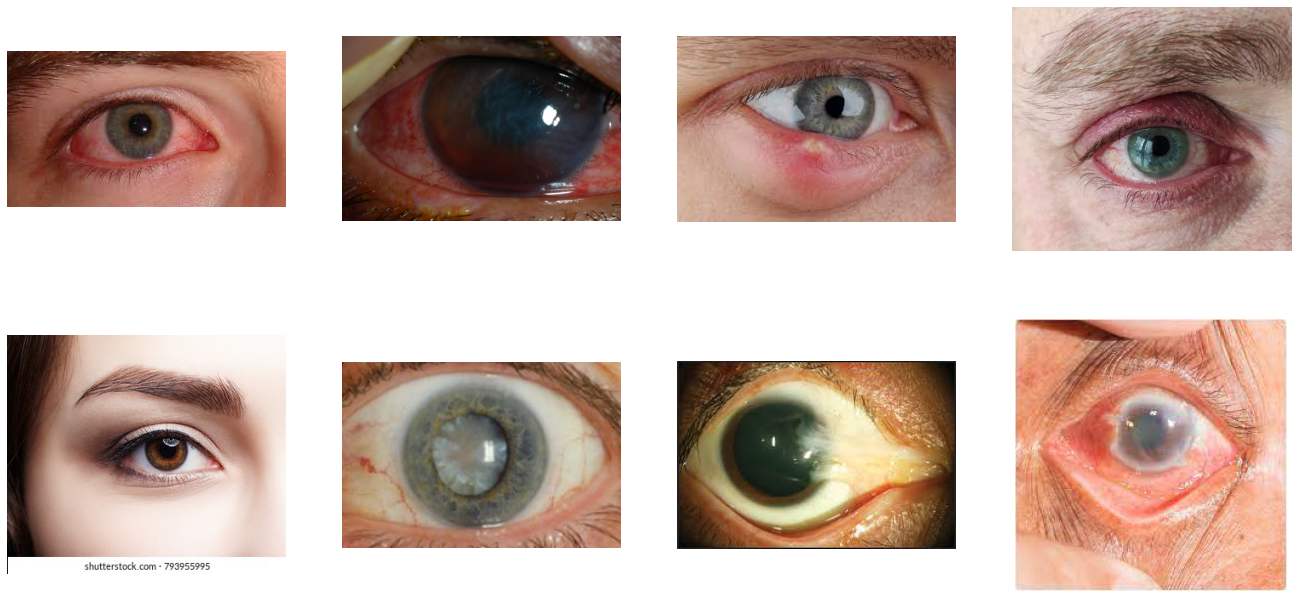

In [79]:
fig = plt.gcf()
fig.set_size_inches(23, 23)

next_pix = images_path
random.shuffle(next_pix)

for i, img_path in enumerate(next_pix[0:8]):
    
    sp = plt.subplot(4, 4, i + 1)
    sp.axis('Off')

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [80]:
shuf = list(zip(images_pixels,labels))
random.shuffle(shuf)
train_data, labels_data = zip(*shuf)

## Step 4. Scaling and Splitting the data into Train and Validation

In [81]:
X_data = np.array(train_data)/255
Y_data =  to_categorical(labels_data, num_classes = 10)

In [82]:
# Splitting the Data into Training and Validation.
# 80-20 split.

X_train, X_val, Y_train, Y_val = train_test_split(X_data, Y_data, test_size = 0.2, random_state=50)

print("X train data : ", len(X_train))
print("X label data : ", len(X_val))
print("Y test data : ", len(Y_train))
print("Y label data : ", len(Y_val))

X train data :  1526
X label data :  382
Y test data :  1526
Y label data :  382


In [83]:
nsamples, nx, ny, nrgb = X_train.shape
X_train2 = X_train.reshape((nsamples,nx*ny*nrgb))
nsamples, nx, ny, nrgb = X_val.shape
X_test2 = X_val.reshape((nsamples,nx*ny*nrgb))

## Step 5.Building the Models

### Model 1:CNN

### Why Use CNN?

Convolutional Neural Networks are a type of deep learning algorithm that are commonly used in image and video analysis tasks. 

CNNs are also scale-invariant, meaning that they can recognize objects of different sizes in an image which is ideal for our dataset. 

CNNs are computationally efficient which allows the network to be trained on large datasets with limited computational resources.

CNNs are a powerful tool for image and video analysis tasks because of their ability to learn spatial and scale-invariant features, their computational efficiency, and their ability to generalize on unseen data.

In [62]:
# Import Keras libraries
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

cnn1 = Sequential()

cnn1.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(100,100,3)))
cnn1.add(MaxPooling2D(pool_size=(2, 2)))

cnn1.add(Dropout(0.2))

cnn1.add(Flatten())

cnn1.add(Dense(10, activation='softmax'))

cnn1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
cnn1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 49, 49, 32)        0         
                                                                 
 flatten_3 (Flatten)         (None, 76832)             0         
                                                                 
 dense_13 (Dense)            (None, 10)                768330    
                                                                 
Total params: 769,226
Trainable params: 769,226
Non-trainable params: 0
________________________________________________

In [63]:
history1 = cnn1.fit(X_train, Y_train,
          batch_size=200,
          epochs=25,
          verbose=1,
          validation_data=(X_val, Y_val))

Epoch 1/25
8/8 [==============================] - 12s 1s/step - loss: 8.6601 - accuracy: 0.1153 - val_loss: 6.7985 - val_accuracy: 0.1649
Epoch 2/25
8/8 [==============================] - 13s 2s/step - loss: 4.7125 - accuracy: 0.1632 - val_loss: 2.7609 - val_accuracy: 0.2408
Epoch 3/25
8/8 [==============================] - 11s 1s/step - loss: 2.7392 - accuracy: 0.3355 - val_loss: 1.8719 - val_accuracy: 0.3272
Epoch 4/25
8/8 [==============================] - 11s 1s/step - loss: 1.8319 - accuracy: 0.3211 - val_loss: 1.7946 - val_accuracy: 0.4058
Epoch 5/25
8/8 [==============================] - 11s 1s/step - loss: 1.5732 - accuracy: 0.4836 - val_loss: 1.6302 - val_accuracy: 0.4215
Epoch 6/25
8/8 [==============================] - 11s 1s/step - loss: 1.4040 - accuracy: 0.5826 - val_loss: 1.5463 - val_accuracy: 0.5209
Epoch 7/25
8/8 [==============================] - 10s 1s/step - loss: 1.2854 - accuracy: 0.6547 - val_loss: 1.4741 - val_accuracy: 0.5524
Epoch 8/25
8/8 [==================

In [64]:
score1 = cnn1.evaluate(X_val, Y_val, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

Test loss: 0.9936164021492004
Test accuracy: 0.7251309156417847


<Figure size 432x288 with 0 Axes>

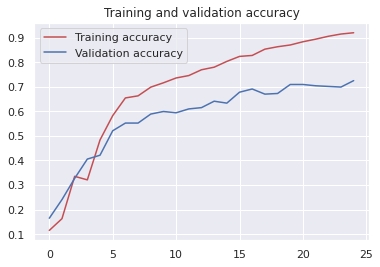

<Figure size 432x288 with 0 Axes>

In [65]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

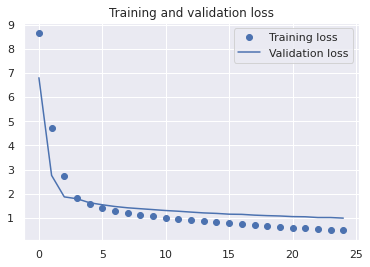

In [66]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Model 2 : CNN Relu

### Why Use Relu?

Rectified Linear Unit (ReLU) is a popular activation function used in deep learning models, particularly in Convolutional Neural Networks (CNNs) and feedforward neural networks.



*   ReLU introduces non-linearity to the model, which allows the network to learn complex and abstract features from the data.
*  ReLU is computationally efficient making it faster to compute than other activation functions such as sigmoid and tanh.
*   ReLU is a widely used activation function in deep learning models because of its non-linearity, computational efficiency, sparsity, gradient flow and robustness.







In [67]:
cnn3 = Sequential()

cnn3.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(100,100,3)))
cnn3.add(MaxPooling2D((2, 2)))

cnn3.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn3.add(MaxPooling2D(pool_size=(2, 2)))
cnn3.add(Dropout(0.2))

cnn3.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))

cnn3.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn3.add(Dropout(0.2))

cnn3.add(Flatten())


cnn3.add(Dense(10, activation='softmax'))

In [68]:
cnn3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
cnn3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 23, 23, 64)       0         
 g2D)                                                            
                                                                 
 dropout_11 (Dropout)        (None, 23, 23, 64)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 21, 21, 128)      

In [69]:
history3 = cnn3.fit(X_train, Y_train,
          batch_size=200,
          epochs=25,
          verbose=1,
          validation_data=(X_val, Y_val))
score3 = cnn3.evaluate(X_val, Y_val, verbose=0)
print('Test loss:', score3[0])
print('Test accuracy:', score3[1])

Epoch 1/25
8/8 [==============================] - 42s 5s/step - loss: 2.3709 - accuracy: 0.1127 - val_loss: 2.2381 - val_accuracy: 0.1414
Epoch 2/25
8/8 [==============================] - 49s 6s/step - loss: 2.1075 - accuracy: 0.2372 - val_loss: 2.0458 - val_accuracy: 0.2932
Epoch 3/25
8/8 [==============================] - 40s 5s/step - loss: 1.8485 - accuracy: 0.3689 - val_loss: 1.8917 - val_accuracy: 0.3665
Epoch 4/25
8/8 [==============================] - 40s 5s/step - loss: 1.6485 - accuracy: 0.4489 - val_loss: 1.6821 - val_accuracy: 0.4817
Epoch 5/25
8/8 [==============================] - 48s 6s/step - loss: 1.4371 - accuracy: 0.5256 - val_loss: 1.7651 - val_accuracy: 0.4450
Epoch 6/25
8/8 [==============================] - 40s 5s/step - loss: 1.3831 - accuracy: 0.5498 - val_loss: 1.4944 - val_accuracy: 0.5445
Epoch 7/25
8/8 [==============================] - 40s 5s/step - loss: 1.1934 - accuracy: 0.6127 - val_loss: 1.5895 - val_accuracy: 0.5183
Epoch 8/25
8/8 [==================

### Model 3: YOLOv3

### Why Use YOLOv3?


*   YOLOv3 is designed to be fast and efficient, and is able to process images and videos at high speeds, making it suitable for real-time object detection applications.
*   YOLOv3 easy to use, making it accessible to a wide range of users, from researchers to practitioners.
*   YOLOv3 is scale-invariant which means that it can detect objects of different sizes, and is also robust to various image transformations like rotation, scaling, and lighting changes which is best suited for our dataset

Overall, YOLOv3 is a versatile and powerful object detection algorithm that can be used for a wide range of applications, making it a popular choice among researchers and practitioners.



In [85]:
from keras.layers import Input, Lambda, Conv2D, MaxPooling2D, BatchNormalization, LeakyReLU, concatenate, UpSampling2D
from keras.models import Model

# define the model
input_shape = (100, 100, 3)
inputs = Input(shape=input_shape)

# the rest of the YOLO v3 architecture
x = Lambda(lambda x: x)(inputs)
x = Conv2D(32, (3, 3), strides=(1, 1), padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.1)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(64, (3, 3), strides=(1, 1), padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.1)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(128, (3, 3), strides=(1, 1), padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.1)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(256, (3, 3), strides=(1, 1), padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.1)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(512, (3, 3), strides=(1, 1), padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.1)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# add final dense layer for 10 label classification
x = Flatten()(x)
x = Dense(1024)(x)
x = LeakyReLU(alpha=0.1)(x)
x = Dense(10, activation='softmax')(x)

model = Model(inputs, x)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# train the model
model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=200, epochs=25)

Epoch 1/25
8/8 [==============================] - 84s 10s/step - loss: 17.9789 - accuracy: 0.1330 - val_loss: 37.2206 - val_accuracy: 0.1021
Epoch 2/25
8/8 [==============================] - 85s 11s/step - loss: 7.7861 - accuracy: 0.1855 - val_loss: 15.4146 - val_accuracy: 0.1047
Epoch 3/25
8/8 [==============================] - 70s 9s/step - loss: 3.3086 - accuracy: 0.2123 - val_loss: 6.4460 - val_accuracy: 0.0812
Epoch 4/25
8/8 [==============================] - 71s 9s/step - loss: 2.6036 - accuracy: 0.2366 - val_loss: 2.4132 - val_accuracy: 0.1204
Epoch 5/25
8/8 [==============================] - 70s 9s/step - loss: 2.2258 - accuracy: 0.2785 - val_loss: 2.3862 - val_accuracy: 0.1257
Epoch 6/25
8/8 [==============================] - 78s 10s/step - loss: 1.9379 - accuracy: 0.3231 - val_loss: 2.3808 - val_accuracy: 0.1257
Epoch 7/25
8/8 [==============================] - 94s 12s/step - loss: 1.8054 - accuracy: 0.3702 - val_loss: 2.4069 - val_accuracy: 0.1335
Epoch 8/25
8/8 [===========

### Model 4: MobileNet
### Why Use MobileNet?


*   MobileNet is a lightweight neural network designed for mobile and embedded devices with limited computational resources
*   MobileNet models are pre-trained on the ImageNet dataset, which contains over 14 million images and 1000 classes. This means that these models can be used for a wide range of image classification and object detection tasks, and can be fine-tuned to perform well on specific tasks.

In summary, MobileNet is a lightweight neural network model that is designed to be efficient in terms of memory and computational resources, making it well suited for deployment on mobile devices and embedded systems.


In [86]:
from keras.applications import MobileNet
from keras.layers import Dense, GlobalAveragePooling2D, Dropout

# create the base pre-trained model
base_model = MobileNet(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# add additional hidden layers
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)

# and a logistic layer with 10 classes
predictions = Dense(10, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional MobileNet layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])

# train the model on the new data for a few epochs
model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=25, batch_size=200)

Epoch 1/25
8/8 [==============================] - 16s 2s/step - loss: 4.2891 - accuracy: 0.2575 - val_loss: 1.5189 - val_accuracy: 0.5052
Epoch 2/25
8/8 [==============================] - 13s 2s/step - loss: 1.4735 - accuracy: 0.4803 - val_loss: 1.3373 - val_accuracy: 0.5340
Epoch 3/25
8/8 [==============================] - 17s 2s/step - loss: 1.2165 - accuracy: 0.5963 - val_loss: 1.2263 - val_accuracy: 0.5707
Epoch 4/25
8/8 [==============================] - 17s 2s/step - loss: 1.0687 - accuracy: 0.6514 - val_loss: 1.0277 - val_accuracy: 0.6675
Epoch 5/25
8/8 [==============================] - 16s 2s/step - loss: 0.8431 - accuracy: 0.7405 - val_loss: 1.0268 - val_accuracy: 0.6545
Epoch 6/25
8/8 [==============================] - 17s 2s/step - loss: 0.7122 - accuracy: 0.7733 - val_loss: 0.9314 - val_accuracy: 0.7094
Epoch 7/25
8/8 [==============================] - 14s 2s/step - loss: 0.5985 - accuracy: 0.8159 - val_loss: 0.9794 - val_accuracy: 0.6885
Epoch 8/25
8/8 [==================

### Model : ResNet

### Why Use ResNet?



*   ResNet is a type of convolutional neural network (CNN) architecture that has been widely used in image classification tasks. The main reason for its popularity is its ability to handle very deep networks, which can have hundreds or even thousands of layers.
*   ResNet allows the gradients to flow more easily through the network and makes it possible to train much deeper networks.


ResNet has shown state-of-the-art performance in many image classification tasks, and its architecture has been used as a building block for many other CNN architectures.

In [87]:
from keras.applications import ResNet50
from keras.layers import Dense, GlobalAveragePooling2D, Dropout

# create the base pre-trained model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(100, 100, 3))

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# add additional hidden layers
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)

# and a logistic layer with 10 classes
predictions = Dense(10, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional ResNet50 layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# train the model on the new data for a few epochs
model.fit(X_train, Y_train, epochs=25, batch_size=200, validation_data=(X_val, Y_val))


Epoch 1/25
8/8 [==============================] - 79s 10s/step - loss: 2.7995 - accuracy: 0.1173 - val_loss: 2.3057 - val_accuracy: 0.1649
Epoch 2/25
8/8 [==============================] - 76s 10s/step - loss: 2.3035 - accuracy: 0.1488 - val_loss: 2.2988 - val_accuracy: 0.1099
Epoch 3/25
8/8 [==============================] - 74s 9s/step - loss: 2.3067 - accuracy: 0.1225 - val_loss: 2.2713 - val_accuracy: 0.1754
Epoch 4/25
8/8 [==============================] - 75s 10s/step - loss: 2.2800 - accuracy: 0.1442 - val_loss: 2.2760 - val_accuracy: 0.1492
Epoch 5/25
8/8 [==============================] - 73s 9s/step - loss: 2.2957 - accuracy: 0.1409 - val_loss: 2.2527 - val_accuracy: 0.1571
Epoch 6/25
8/8 [==============================] - 75s 10s/step - loss: 2.2555 - accuracy: 0.1717 - val_loss: 2.2316 - val_accuracy: 0.1623
Epoch 7/25
8/8 [==============================] - 73s 9s/step - loss: 2.2767 - accuracy: 0.1383 - val_loss: 2.2220 - val_accuracy: 0.1545
Epoch 8/25
8/8 [==============

# **ABOUT THE MODELS:**

Our application is designed to be used with mobile devices. 

Therefore an ideal AI-ML model should:


1.   Have high accuracy.Have high accuracy.
2.   Be resource efficient and perform fast.


Traditional Models like CNN, CNN+Relu performed well with both test and train data, but may not be ideal since they require high computational resource

**The most ideal model for our project would be MobileNet since:**

1.   It has an train accuracy of 99% and test accuracy of 81.94% till 24th epoch.
2.   It is a lightweight neural network model that is designed to be efficient in terms of memory and computational resources, making it well suited for deployment on mobile devices and embedded systems.




# **CONCLUSION:**

The models are effective at correctly classifying an input image into one of ten diseases.

## **The main purpose of this classifier:**


*   A large number of machine learning (ML) based eye disease classifiers created in the past concentrate on helping medical practitioners diagnose and cure eye illnesses. 
*   ***But our project is specifically tailored for general public who cannot afford healthcare services or are not able to go to doctors due to negligence or fear.***


## **Through our models we are able to address these million dollar questions:**



1.   It is difficult for medical professionals to identify eye diseases at an early stage, which can lead to a delay in treatment. Is it possible to speed up this process? ***Absolutely Yes!***
2.   Is it possible to detect other diseases like Jaundice using eye images? ***Absolutely Yes!***

3.   Is it possible for any normal user with no medical knowledge to be able to take a picture of his/her eye and make sure their eye is healthy at zero costs? ***Absolutely Absolutely Yes!***

